In [1]:
# load mnist data set
import cnn_mnist

x_train, y_train, x_valid, y_valid, x_test, y_test = cnn_mnist.mnist()

Using TensorFlow backend.


... loading data
... done loading data


In [2]:
import tensorflow as tf
# from tensorflow.keras import layers
import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(28, 28, 1)
[5 0 4 ..., 8 4 8]


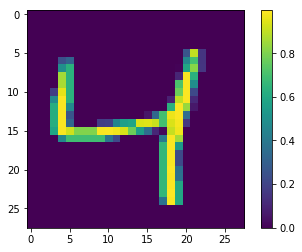

In [3]:
# explore data
print(x_train[0].shape)
print(y_train)
plt.figure()
plt.imshow(np.squeeze(x_train[2]))
plt.colorbar()
plt.grid(False)

In [9]:
n_filters = 16
kernel_size = (3,3)
lr = 0.01
# Set CNN
model = keras.Sequential([
    keras.layers.Conv2D(n_filters, kernel_size, strides=(1, 1), padding='valid', activation=tf.nn.relu, input_shape=(28,28,1), data_format='channels_last'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid'),
    keras.layers.Conv2D(n_filters, kernel_size, strides=(1, 1), padding='valid', activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.SGD(lr, momentum=0.0, decay=0.0, nesterov=False), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
print(y_train[0])

5


Epoch 1/5
 7904/50000 [===>..........................] - ETA: 24s - loss: 1.7708 - acc: 0.4647

KeyboardInterrupt: 

In [13]:
def train_and_validate(x_train, y_train, x_valid, y_valid, num_epochs, lr, num_filters, batch_size, filter_size):
    # TODO: train and validate your convolutional neural networks with the provided data and hyperparameters
    model = keras.Sequential([
    keras.layers.Conv2D(num_filters, filter_size, strides=(1, 1), padding='same', activation=tf.nn.relu, input_shape=(28,28,1), data_format='channels_last'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    keras.layers.Conv2D(num_filters, filter_size, strides=(1, 1), padding='same', activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    model.compile(optimizer=keras.optimizers.SGD(lr, momentum=0.0, decay=0.0, nesterov=False), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    learning_curve = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_valid, y_valid))
#     keras.backend.clear_session()
    return learning_curve, model

In [26]:
learning_rates = (0.1, 0.01, 0.001, 0.0001)
learning_names = ("0.1", "0.01", "0.001", "0.0001")
models = dict()
learning_curve = dict()
num_epochs = 5
num_filters = 16
batch_size = 32
filter_size = (3,3)
# print(learning_names)
# for i in learning_rates:
#     print(i)
for l in learning_rates:
    learning_curve[l], models[l] = train_and_validate(x_train, y_train, x_valid, y_valid, num_epochs, l, num_filters, batch_size, filter_size)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 27s 534us/step - loss: 0.2046 - acc: 0.9361 - val_loss: 0.0884 - val_acc: 0.9741
Epoch 2/5
50000/50000 [==============================] - 26s 522us/step - loss: 0.0724 - acc: 0.9773 - val_loss: 0.0559 - val_acc: 0.9834
Epoch 3/5
50000/50000 [==============================] - 30s 604us/step - loss: 0.0491 - acc: 0.9844 - val_loss: 0.0561 - val_acc: 0.9849
Epoch 4/5
50000/50000 [==============================] - 30s 604us/step - loss: 0.0387 - acc: 0.9874 - val_loss: 0.0555 - val_acc: 0.9840
Epoch 5/5
50000/50000 [==============================] - 30s 605us/step - loss: 0.0299 - acc: 0.9905 - val_loss: 0.0470 - val_acc: 0.9868
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 31s 615us/step - loss: 0.5552 - acc: 0.8366 - val_loss: 0.2095 - val_acc: 0.9363
Epoch 2/5
50000/50000 [==============================] - 30s 608us/step 

In [24]:
print(learning_curve[0.1].history)

{'acc': [0.93674000000000002, 0.97948000000000002, 0.98587999999999998, 0.98862000000000005, 0.99114000000000002], 'loss': [0.20176668702349065, 0.065771644303984939, 0.045388192669376728, 0.035958912259750071, 0.028114843204711797]}


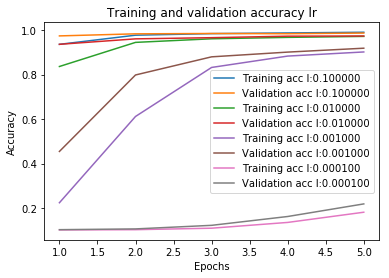

In [31]:
# plot the results
for l in learning_rates:
    acc = learning_curve[l].history['acc']
    val_acc = learning_curve[l].history['val_acc']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, label=('Training acc l:%f' %l))
    plt.plot(epochs, val_acc, label=('Validation acc l:%f' %l))
plt.title('Training and validation accuracy lr')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

__Answer__: We see that the high learning rates (0.1 & 0.01) reach the >90% accuracy relatively fast and the learning curve is flat - meaning that the NN doesn't learn that much in later epochs. The actual learning happens in the first couple of epochs. The low learning rate (0.0001) shows that our network doesn't learn at all. The steps we make during gradient descent are too small for us to reach the minimum. The middle learning rate (0.001) has a nice smooth curve, although it doesn't reach validation accuracy higher than ~92%. Furthermore it doesn't exhibit any overfitting (the validation accuracy is better than the training).

In [37]:
lr = 0.001
models_filter = dict()
learning_curve_filter = dict()
num_epochs = 5
num_filters = 16
batch_size = 32
filter_sizes = ((1,1), (3,3), (5,5), (7,7))

for i, s in enumerate(filter_sizes):
    learning_curve_filter[s], models_filter[s] = train_and_validate(x_train, y_train, x_valid, y_valid, num_epochs, lr, num_filters, batch_size, filter_size=filter_sizes[i])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 16s 311us/step - loss: 2.1953 - acc: 0.3169 - val_loss: 2.0430 - val_acc: 0.5311
Epoch 2/5
50000/50000 [==============================] - 15s 295us/step - loss: 1.7528 - acc: 0.5978 - val_loss: 1.3279 - val_acc: 0.6921
Epoch 3/5
50000/50000 [==============================] - 15s 307us/step - loss: 1.0458 - acc: 0.7184 - val_loss: 0.7843 - val_acc: 0.7859
Epoch 4/5
50000/50000 [==============================] - 17s 332us/step - loss: 0.7426 - acc: 0.7774 - val_loss: 0.6285 - val_acc: 0.8118
Epoch 5/5
50000/50000 [==============================] - 16s 315us/step - loss: 0.6410 - acc: 0.8008 - val_loss: 0.5655 - val_acc: 0.8269
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 39s 779us/step - loss: 2.2492 - acc: 0.3063 - val_loss: 2.1687 - val_acc: 0.4008
Epoch 2/5
50000/50000 [==============================] - 38s 763us/step 

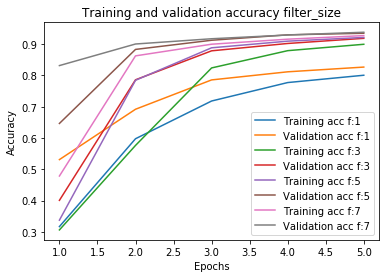

In [41]:
# plot the results
for s in filter_sizes:
    acc = learning_curve_filter[s].history['acc']
    val_acc = learning_curve_filter[s].history['val_acc']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, label=('Training acc f:%i' %s[0]))
    plt.plot(epochs, val_acc, label=('Validation acc f:%i' %s[0]))
plt.title('Training and validation accuracy filter_size')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

__Answer__: Small filter size (1x1) doesn't have enough capacity to learn the features we need in this case. 3x3 filter showes best performance in aspect of training time and validation accuracy. The two bigger filters (5x5, 7x7) need a lot more time for training and do not show a significantly better performance.
My guess would be that bigger filters would make sense for bigger images, and vice versa for small filters. However we see that too small of a filter or too big can be equally as bad but in a different way. 

In [4]:
# Task 4: Random Search
import logging

logging.basicConfig(level=logging.WARNING)

import hpbandster.core.nameserver as hpns

from hpbandster.optimizers import RandomSearch

import ConfigSpace as CS
import ConfigSpace.hyperparameters as CSH
from hpbandster.core.worker import Worker
import argparse


class MyWorker(Worker):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.x_train, self.y_train, self.x_valid, self.y_valid, self.x_test, self.y_test = cnn_mnist.mnist("./")

    def compute(self, config, budget, **kwargs):
        """
        Evaluates the configuration on the defined budget and returns the validation performance.

        Args:
            config: dictionary containing the sampled configurations by the optimizer
            budget: (float) amount of time/epochs/etc. the model can use to train
        Returns:
            dictionary with mandatory fields:
                'loss' (scalar)
                'info' (dict)
        """
        lr = config["learning_rate"]
        num_filters = config["num_filters"]
        batch_size = config["batch_size"]
        filter_size = config["filter_size"]

        epochs = budget

        # TODO: train and validate your convolutional neural networks here
        learning_curve, model = train_and_validate(self.x_train, self.y_train, self.x_valid, self.y_valid, budget, lr, num_filters, batch_size, filter_size)
        # TODO: We minimize so make sure you return the validation error here
        validation_acc = learning_curve.history['val_acc']
        return ({
            'loss': 1 - validation_acc[-1],  # this is the a mandatory field to run hyperband
            'info': {}  # can be used for any user-defined information - also mandatory
        })

    @staticmethod
    def get_configspace():
        config_space = CS.ConfigurationSpace()

        # TODO: Implement configuration space here. See https://github.com/automl/HpBandSter/blob/master/hpbandster/examples/example_5_keras_worker.py  for an example
        # learning rate
        learning_rate = CSH.UniformFloatHyperparameter('learning_rate', lower=1e-4, upper=1e-1, default_value='1e-2', log=True)
        # number of filters
        num_filters = CSH.UniformIntegerHyperparameter('num_filters', lower=8, upper=64, default_value=16, log=True)
        # batch size
        batch_size = CSH.UniformIntegerHyperparameter('batch_size', lower=16, upper=128, default_value=32, log=True)
        # filter size
        filter_size = CSH.CategoricalHyperparameter('filter_size', [(3,3), (5,5)])
        
        config_space.add_hyperparameters([learning_rate, num_filters, batch_size, filter_size])
        return config_space

D:\Programs\Anaconda3\envs\tensflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


... loading data
... done loading data
Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 83s 2ms/step - loss: 2.2884 - acc: 0.2028 - val_loss: 2.2582 - val_acc: 0.2354
Epoch 2/6
50000/50000 [==============================] - 82s 2ms/step - loss: 2.2238 - acc: 0.2589 - val_loss: 2.1850 - val_acc: 0.2829
Epoch 3/6
50000/50000 [==============================] - 145s 3ms/step - loss: 2.1293 - acc: 0.3122 - val_loss: 2.0566 - val_acc: 0.3556
Epoch 4/6
50000/50000 [==============================] - 197s 4ms/step - loss: 1.9486 - acc: 0.4255 - val_loss: 1.8017 - val_acc: 0.5382
Epoch 5/6
50000/50000 [==============================] - 187s 4ms/step - loss: 1.6047 - acc: 0.6324 - val_loss: 1.3561 - val_acc: 0.7360
Epoch 6/6
50000/50000 [==============================] - 193s 4ms/step - loss: 1.1458 - acc: 0.7583 - val_loss: 0.9138 - val_acc: 0.8122
Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==================

50000/50000 [==============================] - 124s 2ms/step - loss: 1.9818 - acc: 0.5199 - val_loss: 1.6630 - val_acc: 0.6647
Epoch 3/6
50000/50000 [==============================] - 127s 3ms/step - loss: 1.2421 - acc: 0.7059 - val_loss: 0.8477 - val_acc: 0.7875
Epoch 4/6
50000/50000 [==============================] - 259s 5ms/step - loss: 0.7163 - acc: 0.8065 - val_loss: 0.5496 - val_acc: 0.8504
Epoch 5/6
50000/50000 [==============================] - 307s 6ms/step - loss: 0.5308 - acc: 0.8534 - val_loss: 0.4329 - val_acc: 0.8815
Epoch 6/6
50000/50000 [==============================] - 333s 7ms/step - loss: 0.4461 - acc: 0.8754 - val_loss: 0.3746 - val_acc: 0.8945
Best found configuration: {'num_filters': 22, 'learning_rate': 0.03720693481704873, 'filter_size': (5, 5), 'batch_size': 95}


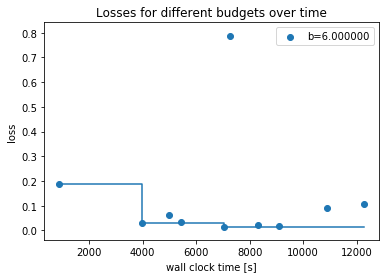

In [5]:
# parser = argparse.ArgumentParser(description='Example 1 - sequential and local execution.')
# parser.add_argument('--budget', type=float,
#                     help='Maximum budget used during the optimization, i.e the number of epochs.', default=6)
# parser.add_argument('--n_iterations', type=int, help='Number of iterations performed by the optimizer', default=50)
# args = parser.parse_args()
budget = 6
n_iterations = 10
# Step 1: Start a nameserver
# Every run needs a nameserver. It could be a 'static' server with a
# permanent address, but here it will be started for the local machine with the default port.
# The nameserver manages the concurrent running workers across all possible threads or clusternodes.
# Note the run_id argument. This uniquely identifies a run of any HpBandSter optimizer.
NS = hpns.NameServer(run_id='example1', host='127.0.0.1', port=None)
NS.start()

# Step 2: Start a worker
# Now we can instantiate a worker, providing the mandatory information
# Besides the sleep_interval, we need to define the nameserver information and
# the same run_id as above. After that, we can start the worker in the background,
# where it will wait for incoming configurations to evaluate.
w = MyWorker(nameserver='127.0.0.1', run_id='example1')
w.run(background=True)

# Step 3: Run an optimizer
# Now we can create an optimizer object and start the run.
# Here, we run RandomSearch, but that is not essential.
# The run method will return the `Result` that contains all runs performed.

rs = RandomSearch(configspace=w.get_configspace(),
                  run_id='example1', nameserver='127.0.0.1',
                  min_budget=int(budget), max_budget=int(budget))
res = rs.run(n_iterations=n_iterations)

# Step 4: Shutdown
# After the optimizer run, we must shutdown the master and the nameserver.
rs.shutdown(shutdown_workers=True)
NS.shutdown()

# Step 5: Analysis
# Each optimizer returns a hpbandster.core.result.Result object.
# It holds information about the optimization run like the incumbent (=best) configuration.
# For further details about the Result object, see its documentation.
# Here we simply print out the best config and some statistics about the performed runs.
id2config = res.get_id2config_mapping()
incumbent = res.get_incumbent_id()

print('Best found configuration:', id2config[incumbent]['config'])


# Plots the performance of the best found validation error over time
all_runs = res.get_all_runs()
# Let's plot the observed losses grouped by budget,
import hpbandster.visualization as hpvis

hpvis.losses_over_time(all_runs)

import matplotlib.pyplot as plt
plt.savefig("random_search.png")

# TODO: retrain the best configuration (called incumbent) and the test error

In [14]:
# train a network with the best found parameters
learning_rate = 0.0372
num_filters = 22
filter_size = (5,5)
batch_size = 95
learning_curve, model = train_and_validate(x_train, y_train, x_valid, y_valid, budget, learning_rate, num_filters, batch_size, filter_size)


Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 100s 2ms/step - loss: 0.4545 - acc: 0.8591 - val_loss: 0.2050 - val_acc: 0.9334
Epoch 2/6
50000/50000 [==============================] - 112s 2ms/step - loss: 0.1143 - acc: 0.9647 - val_loss: 0.0884 - val_acc: 0.9740
Epoch 3/6
50000/50000 [==============================] - 113s 2ms/step - loss: 0.0802 - acc: 0.9750 - val_loss: 0.0906 - val_acc: 0.9713
Epoch 4/6
50000/50000 [==============================] - 123s 2ms/step - loss: 0.0648 - acc: 0.9797 - val_loss: 0.0726 - val_acc: 0.9774
Epoch 5/6
50000/50000 [==============================] - 264s 5ms/step - loss: 0.0542 - acc: 0.9829 - val_loss: 0.0606 - val_acc: 0.9817
Epoch 6/6
50000/50000 [==============================] - 256s 5ms/step - loss: 0.0483 - acc: 0.9846 - val_loss: 0.0557 - val_acc: 0.9842


In [15]:
test_score = model.evaluate(x_test, y_test)
print('Test error: %f' %(1-test_score[1]))

10000/10000 [==============================] - 9s 911us/step
Test error: 0.014500
